# PRIVATE INVESTMENT IN EDUCATION
# Model Becker-Tomes without credit constraints (1986)

Imports and set magics:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import sympy as sm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from types import SimpleNamespace
from ipywidgets import interact, FloatSlider
import math

# Ensure modules are reloaded on each run
%load_ext autoreload
%autoreload 2

# Assuming the class BeckerTomesModelDebugged is defined in the module named Noah
from modelproject import BeckerTomesModelDebugged

# Create an instance of the model
model = BeckerTomesModelDebugged()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

The model proposed by Becker and Tomes in 1967 focuses specifically on the investment decisions individuals make regarding their education without considering financial constraints. This model contributes to literature on intergenerational income persistence and inequality. 

Additionality, it is relevant for understanding how individuals make decisions about investing in education and human capital formation when they do not face limitations on accessing financial resources or credit.

In it important to consider that, we have to take the following assumptions to get into the model:
- Parents invest in children's human capital.
- Structure or credit markets matter.
- Intergenerational income persistence via heritability of endowments (Income effect transmitted via human capital investment), which means that if parents have a mean above or below incomes, their children will have incomes closer to the mean than parents. 
- The heritability leads to "regression to mean" of human capital and income, which means that when a variable is extreme at the first measurement, it will tend to be closer to average on its second measurement. 

The model presents a representative individual whose chooses how much time to invest in education in 2 periods in time ${t-1}$ (Child youth and parent adulthood) and time ${t}$ (Child adulthood, and grandchild). Human capital production depends on parental and public expenditures and endowment. 

The equation we have to maximize is: 

$$
Max_{x_{t-1}}Y_{t}-(1+r_{t})D_{t-1}
$$

$$
s.t
$$

$$
Y_{t}=H_{t}+I_{t}
$$

$$
H_{t}=\psi({x_{t-1}},{s_{t-1}},{E_{t}})
$$

$$
E_{t}= \alpha_{t} + h{E_{t-1}} + v_{t}
$$

$$
D_{t-1}= C_{t-1}+ x_{t-1}-Y_{t-1}
$$

Where $Y_{t}$ is the maximization of the children's income, $H_{t}$ is the Human Capital, Luckiness is represented by $I_{t}$, $x_{t-1}$ is the parents investment in education, $s_{t-1}$ is the government investment in education, $E_{t}$ is the children's endowments, $h$ is the intergenerational feature, the rate from the financial market is represented by $r_{t}$, $C_{t-1}$ is the Consumption, and $(1+r_{t})D_{t-1}$ is when children pay for the debt with an interest rate.

Notice that:

$\psi'(.)>0$ in all inputs ($H_{t}$ is a growing functions) and $\psi'(.)<0$ shows a decreasing returns.

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

In [24]:
# Solve the model using continuous optimization
model.solve_continuous()
# Print the results from the continuous solution
print(f'Optimal parental investment: {model.sol.optimal_X}')
print(f'Human capital level: {model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0)}')
print(f'Optimal income: {model.calc_income(model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0), model.par.I1)}')

Optimal parental investment: 0.2003270380467629
Human capital level: 1.6456489822863487
Optimal income: 2.1456489822863487


In [25]:
# Solve the model using discrete optimization
model.solve_discrete()

# Access and print the optimal values from the discrete solution
print(f'Optimal X0: {model.sol.optimal_X0}')
print(f'Optimal E1: {model.endowment_production(model.par.E0)}')
print(f'Optimal H1: {model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0))}')
print(f'Optimal Y1: {model.calc_income(model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0)), model.par.I1)}')
print(f'Optimal D1: {model.calc_debt(model.sol.optimal_X0, model.par.Y0)}')

Optimal X0: 0.20202020202020202
Optimal E1: 1.42
Optimal H1: 1.95342161035749
Optimal Y1: 2.45342161035749
Optimal D1: 0.20202020202020243


**Comparative Statics: Analysis of Optimal Income and Optimal Investment in education in response to parameter changes**

This section will analyze the change in Optimal Income Y1 and in Optimal Investment in education X0 in response to change in the following parameters: X0, I1, r, E0, h. We are using the continous approach to evaluate the impacts.


### The impact of Parental Education Investment on Income

/Users/noahindrehus/Documents/KU Exchange/IPNA/projects-2024-petra-maritza-noah-1/modelproject/modelproject.py:30: RuntimeWarning:

invalid value encountered in power



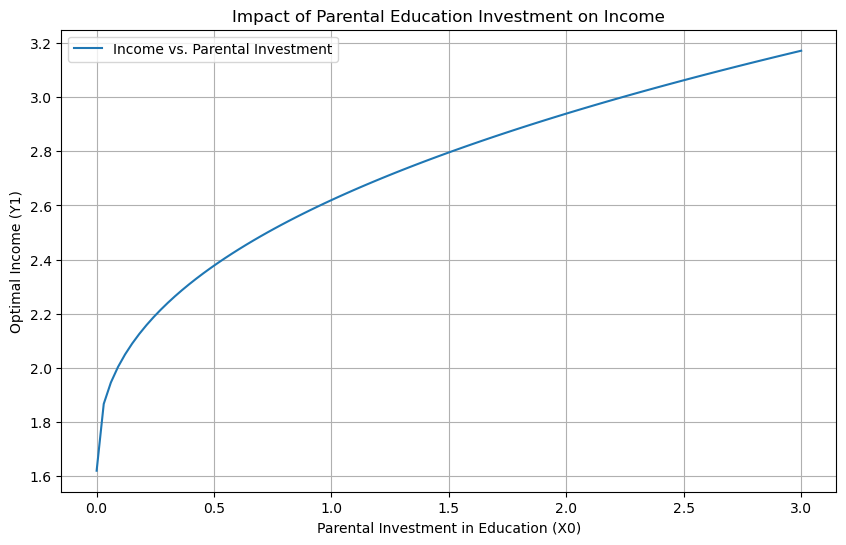

In [26]:
# Set a range of values for parental investment (X0)
X0_values = np.linspace(0, 3, 100)  # Adjust the range and count as needed
income_results = []

# Iterate over the range of X0 values, solve the model, and collect incomes
for X0 in X0_values:
    model.par.X0 = X0  # Update the parental investment parameter
    model.solve_continuous()  # Solve the model (assuming this updates the model.sol with new values)
    optimal_H = model.human_capital_production(X0, model.par.S0, model.par.E0)
    optimal_income = model.calc_income(optimal_H, model.par.I1)
    income_results.append(optimal_income)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X0_values, income_results, label='Income vs. Parental Investment')
plt.xlabel('Parental Investment in Education (X0)')
plt.ylabel('Optimal Income (Y1)')
plt.title('Impact of Parental Education Investment on Income')
plt.grid(True)
plt.legend()
plt.show()

**Interpretation**

Augmenting the Parental Investment in Education at time 0 enhances the Optimal Income of the children in the subsequent period. Notably, the graph reveals diminishing returns from education investment. This implies that when parents have already allocated a significant sum to education, further increments in investment yield only marginal increases in children's income. Conversely, when parental investment is minimal, even slight enhancements result in substantial rises in children's income.

### The impact of Parental Education Investment on Income with varying Luckiness

In [9]:
def interactive_plot(Y0):
    model.par.Y0 = Y0
    X0_values = np.linspace(0, 1, 100)  # Parental investment range
    Y1_values = []

    for X0 in X0_values:
        E1 = model.endowment_production(model.par.E0)
        H1 = model.human_capital_production(X0, model.par.S0, E1)
        Y1 = model.calc_income(H1, Y0)
        Y1_values.append(Y1)

    plt.figure(figsize=(10, 6))
    plt.plot(X0_values, Y1_values, label=f'Luckiness (I1) = {Y0:.2f}')
    plt.xlabel('Parental Investment in Education (X0)')
    plt.ylabel('Optimal Income (Y1)')
    plt.title('Impact of Parental Investment on Optimal Income with Varying Luckiness')
    plt.ylim(2.5, 6)  # Set a fixed y-axis range, adjust as needed
    plt.legend()
    plt.grid(True)
    plt.show()

Y0_slider = FloatSlider(min=0, max=1, step=0.05, value=0.5, description='Luckiness (I1)')
interact(interactive_plot, Y0=Y0_slider)

interactive(children=(FloatSlider(value=0.5, description='Luckiness (I1)', max=1.0, step=0.05), Output()), _do…

<function __main__.interactive_plot(Y0)>

**Interpretation**

The graph above displays that varying the coefficient that measues Luckiness in the job market significantly impact the income level of the child. Luckiness could consist in how well the economy is going when the child graduates, giving higher opportunities to find a well-paid job. In this sense, everything else kept equal, for a specific level of parental investment in education (X0) a higher luckiness level shifts the function upwards, corresponding to a higher income of the child.

### The impact of Financial Interest Rate on Optimal Parental Investment in Education


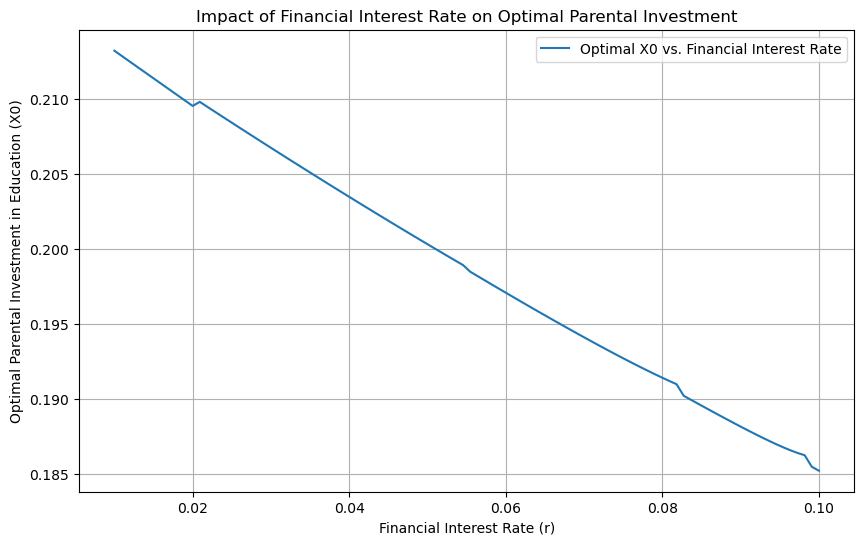

In [28]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Set a range of values for the rate of return (r)
r_values = np.linspace(0.01, 0.1, 100)  # Range of rates of return
X0_values_at_optimal = []  # List to hold X0 values at optimal points

for r in r_values:
    model.par.rt = r  # Update the rate of return in the model
    model.solve_continuous()  # Solve the model
    X0_values_at_optimal.append(model.sol.optimal_X)  # Collect the optimal X0 for each rate

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_values, X0_values_at_optimal, label='Optimal X0 vs. Financial Interest Rate')
plt.xlabel('Financial Interest Rate (r)')
plt.ylabel('Optimal Parental Investment in Education (X0)')
plt.title('Impact of Financial Interest Rate on Optimal Parental Investment')
plt.grid(True)
plt.legend()
plt.show()

**Interpretation**

The graph above displays that when the Financial Interest Rate (r) increases, parents will decrease their Optimal Investment in Education. This could be explained by the fact that an increase in the interest rate makes the debt that the children have to repay in the future more expensive. In this way, the future income of the children will not be able to repay the larger debt, hence leading to a reduction in parental investment.

### The impact of Initial Endowment on Optimal Income with varying Inheritability

In [10]:
# Initialize the model
model = BeckerTomesModelDebugged()

def interactive_plot(h):
    model.par.h = h  # Update the inheritability of endowments
    E0_values = np.linspace(0, 10, 100)  # Range of initial endowments
    Y1_values = []  # List to hold Y1 values

    for E0 in E0_values:
        model.par.E0 = E0  # Update the initial endowment in the model
        solution = model.solve_continuous()  # Solve the model
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(E0)
            H1 = model.human_capital_production(model.sol.optimal_X, model.par.S0, E1)
            Y1 = model.calc_income(H1, model.par.I1)
            Y1_values.append(Y1)  # Collect the optimal Y1 for each E0
        else:
            Y1_values.append(None)  # Append None or a default value if optimal_X is not available

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(E0_values, Y1_values, label=f'Inheritability (h) = {h:.2f}')
    plt.xlabel('Initial Endowment (E0)')
    plt.ylabel('Optimal Income (Y1)')
    plt.title('Impact of Initial Endowment on Optimal Income with Varying Inheritability')
    plt.ylim(1.5, 6)  # Set a fixed y-axis range, adjust as needed
    plt.legend()
    plt.grid(True)
    plt.show()

h_slider = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Inheritability (h)')
interact(interactive_plot, h=h_slider)

interactive(children=(FloatSlider(value=0.5, description='Inheritability (h)', max=1.0, step=0.01), Output()),…

<function __main__.interactive_plot(h)>

**Interpretation**
    
The graph above displays the relationship between the Initial Endowment (E0) and Optimal Income (Y1) with a varying Inheritability level (h: 0<h<1). According to this model, in a world without credit constraints, income inequality and intergenerational correlation of human capital only stem from inheritability of endowments (h). This means that since everyone can borrow as much as they want, everything else kept equal, the only factor that enhance intergenerational inequality is the starting level of endowment that everyone have. This could be represented as the genes of an individual or as other features that parents give to their children. Richer parents will generally be able to transmit higher Endowment to their children, which will lead to higher human capital, hence also a higher investment in their education, ultimately impacting their income as adults. If we assume an unrealistic world in which parents cannot transmit any endowment to their children, hence having no inheritability of abilities (h=0), we can show in the graph how the initial endowment of every children (E0) does not influence their future income. The more this parameter is increased, the higher the inequality in income Y1 is achieved across individuals with different endowments E0, increasing the intergenerational persistence of inequality.

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

In [31]:

# Initialize the model
model = BeckerTomesModelDebugged()

# Define ranges for Initial Endowment (E0) and Inheritability (h)
E0_values = np.linspace(0, 10, 50)  # Range of initial endowments
h_values = np.linspace(0, 1, 50)    # Range of inheritability values

# Prepare storage for computed Optimal Income (Y1)
Y1_values = np.zeros((len(h_values), len(E0_values)))

# Compute Y1 over grid of E0 and h
for j, E0 in enumerate(E0_values):
    for i, h in enumerate(h_values):
        model.par.h = h
        model.par.E0 = E0
        model.solve_continuous()
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(E0)
            H1 = model.human_capital_production(model.sol.optimal_X, model.par.S0, E1)
            Y1 = model.calc_income(H1, model.par.I1)
            Y1_values[i, j] = Y1
        else:
            Y1_values[i, j] = np.nan  # Use NaN for cases where solution is not found

# Generate meshgrid for plotting
E0_mesh, h_mesh = np.meshgrid(E0_values, h_values)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(
    x=E0_mesh, y=h_mesh, z=Y1_values,
    contours={
        'z': {
            'show': True,
            'usecolormap': True,
            'highlightcolor': "limegreen",
            'project_z': True
        }
    }
)])

# Update traces for aesthetics and hover information
fig.update_traces(
    colorscale="Viridis",
    hovertemplate="Initial Endowment (E0): %{x}<br>Inheritability (h): %{y}<br>Optimal Income (Y1): %{z}<extra></extra>"
)

# Configure the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Initial Endowment (E0)', showgrid=True),
        yaxis=dict(title='Inheritability (h)', showgrid=True),
        zaxis=dict(title='Optimal Income (Y1)', showgrid=True)
    ),
    title="Impact of Initial Endowment and Inheritability on Optimal Income",
    width=1000,
    height=800
)

fig.show()

In [32]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Define ranges for Private Investment (X0) and Public Investment (S0)
X0_values = np.linspace(0, 10, 50)  # Range of private investment
S0_values = np.linspace(0, 10, 50)  # Range of public investment

# Prepare storage for computed Human Capital (H1)
H1_values = np.zeros((len(X0_values), len(S0_values)))

# Compute H1 over grid of X0 and S0
for i, X0 in enumerate(X0_values):
    for j, S0 in enumerate(S0_values):
        model.par.X0 = X0  # Set the model's private investment
        model.par.S0 = S0  # Set the model's public investment
        model.solve_continuous()
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(model.par.E0)  # Calculate endowment at the next period
            H1 = model.human_capital_production(X0, S0, E1)  # Calculate human capital
            H1_values[i, j] = H1
        else:
            H1_values[i, j] = np.nan  # Use NaN for cases where solution is not found

# Generate meshgrid for plotting
X0_mesh, S0_mesh = np.meshgrid(X0_values, S0_values)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(
    x=X0_mesh, y=S0_mesh, z=H1_values,
    contours={
        'z': {
            'show': True,
            'usecolormap': True,
            'highlightcolor': "limegreen",
            'project_z': True
        }
    }
)])

# Update traces for aesthetics and hover information
fig.update_traces(
    colorscale="Viridis",
    hovertemplate="Private Investment (X0): %{x}<br>Public Investment (S0): %{y}<br>Human Capital (H1): %{z}<extra></extra>"
)

# Configure the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Private Investment (X0)', showgrid=True),
        yaxis=dict(title='Public Investment (S0)', showgrid=True),
        zaxis=dict(title='Human Capital (H1)', showgrid=True)
    ),
    title="Impact of Private and Public Investment on Human Capital",
    width=1000,
    height=800
)

fig.show()

First Graph: Slightly Privately Weighted Model
This graph represents a scenario where private investment (X0) is slightly more influential than public investment (S0) in developing human capital (H1). The visualization shows that increases in private investment have a marginally more pronounced impact on human capital, reflecting a model where private contributions play a critical but not overwhelming role alongside public funding. This shows a mixed-market economic model where both sectors contribute significantly to education and human capital development.

In [34]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Define ranges for Private Investment (X0) and Public Investment (S0)
X0_values = np.linspace(0, 10, 50)  # Range of private investment
S0_values = np.linspace(0, 10, 50)  # Range of public investment

# Prepare storage for computed Human Capital (H1)
H1_values = np.zeros((len(X0_values), len(S0_values)))

# Compute H1 over grid of X0 and S0
for i, X0 in enumerate(X0_values):
    for j, S0 in enumerate(S0_values):
        model.par.X0 = X0  # Set the model's private investment
        model.par.S0 = S0  # Set the model's public investment
        model.solve_continuous1()
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(model.par.E0)  # Calculate endowment at the next period
            H1 = model.human_capital_production1(X0, S0, E1)  # Calculate human capital
            H1_values[i, j] = H1
        else:
            H1_values[i, j] = np.nan  # Use NaN for cases where solution is not found

# Generate meshgrid for plotting
X0_mesh, S0_mesh = np.meshgrid(X0_values, S0_values)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(
    x=X0_mesh, y=S0_mesh, z=H1_values,
    contours={
        'z': {
            'show': True,
            'usecolormap': True,
            'highlightcolor': "limegreen",
            'project_z': True
        }
    }
)])

# Update traces for aesthetics and hover information
fig.update_traces(
    colorscale="Viridis",
    hovertemplate="Private Investment (X0): %{x}<br>Public Investment (S0): %{y}<br>Human Capital (H1): %{z}<extra></extra>"
)

# Configure the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Private Investment (X0)', showgrid=True),
        yaxis=dict(title='Public Investment (S0)', showgrid=True),
        zaxis=dict(title='Human Capital (H1)', showgrid=True)
    ),
    title="Impact of Private and Public Investment on Human Capital",
    width=1000,
    height=800
)

fig.show()

/Users/noahindrehus/Documents/KU Exchange/IPNA/projects-2024-petra-maritza-noah-1/modelproject/modelproject.py:88: RuntimeWarning:

invalid value encountered in power



Second Graph: American Example with Emphasis on Private Investment
The second graph represents a scenario often seen in the American economic context, where private investment in education is weighted more heavily than public investment. Here, the surface plot shows a steep rise in human capital primarily driven by increases in private investment (X0), with relatively minor contributions from public investment (S0). This graph highlights the critical role of private funding in education within the American system, where higher private contributions are expected to yield greater increases in human capital.

In [35]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Define ranges for Private Investment (X0) and Public Investment (S0)
X0_values = np.linspace(0, 10, 50)  # Range of private investment
S0_values = np.linspace(0, 10, 50)  # Range of public investment

# Prepare storage for computed Human Capital (H1)
H1_values = np.zeros((len(X0_values), len(S0_values)))

# Compute H1 over grid of X0 and S0
for i, X0 in enumerate(X0_values):
    for j, S0 in enumerate(S0_values):
        model.par.X0 = X0  # Set the model's private investment
        model.par.S0 = S0  # Set the model's public investment
        model.solve_continuous2()
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(model.par.E0)  # Calculate endowment at the next period
            H1 = model.human_capital_production2(X0, S0, E1)  # Calculate human capital
            H1_values[i, j] = H1
        else:
            H1_values[i, j] = np.nan  # Use NaN for cases where solution is not found

# Generate meshgrid for plotting
X0_mesh, S0_mesh = np.meshgrid(X0_values, S0_values)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(
    x=X0_mesh, y=S0_mesh, z=H1_values,
    contours={
        'z': {
            'show': True,
            'usecolormap': True,
            'highlightcolor': "limegreen",
            'project_z': True
        }
    }
)])

# Update traces for aesthetics and hover information
fig.update_traces(
    colorscale="Viridis",
    hovertemplate="Private Investment (X0): %{x}<br>Public Investment (S0): %{y}<br>Human Capital (H1): %{z}<extra></extra>"
)

# Configure the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Private Investment (X0)', showgrid=True),
        yaxis=dict(title='Public Investment (S0)', showgrid=True),
        zaxis=dict(title='Human Capital (H1)', showgrid=True)
    ),
    title="Impact of Private and Public Investment on Human Capital",
    width=1000,
    height=800
)

fig.show()

/Users/noahindrehus/Documents/KU Exchange/IPNA/projects-2024-petra-maritza-noah-1/modelproject/modelproject.py:94: RuntimeWarning:

invalid value encountered in power



Third Graph: Scandinavian Example with Emphasis on Public Investment
The third graph showcases a model typical of Scandinavian countries, where public investment in education is significantly more influential than private investment. The graph illustrates that human capital (H1) primarily increases through substantial public investment (S0), with private investment (X0) playing a less dominant role. This reflects the educational and economic policies prevalent in Scandinavian countries, where education is largely funded by the state and is seen as a collective good with substantial public investment.

Each graph visually encapsulates the impact of differing educational investment strategies on the development of human capital, offering insights into how different economic models and societal values can shape educational outcomes. These visualizations serve as a powerful tool for comparing and contrasting the effectiveness and implications of private versus public investment in education across different cultural and economic frameworks.

# Conclusion

Add concise conclusion. 